<a href="https://colab.research.google.com/github/JasVavdiya/100_days_of_AI_ML/blob/main/PlacementPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.shape

(100, 4)

In [6]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [9]:
import matplotlib.pyplot as plt

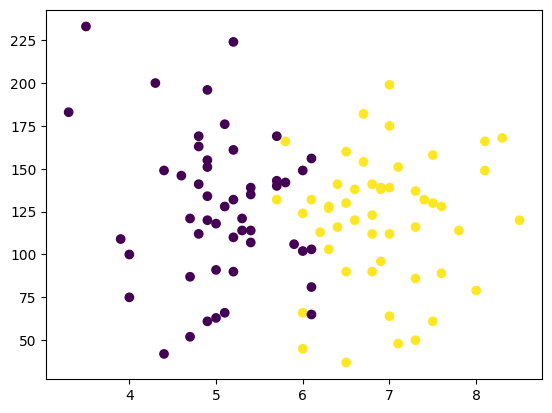

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
x = df.iloc[:,0:2]

y = df.iloc[:,-1]

In [12]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [13]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
print(x_train)
print(x_test)
print(y_train)
print(y_test)


    cgpa     iq
19   5.2  132.0
41   5.4  114.0
51   4.8  141.0
7    5.0   63.0
22   4.9  120.0
..   ...    ...
99   6.2  113.0
79   6.5   90.0
40   4.9  134.0
57   6.5  130.0
97   6.7  182.0

[90 rows x 2 columns]
    cgpa     iq
91   7.5  158.0
92   5.2  110.0
58   8.0   79.0
64   7.0   64.0
25   5.0   91.0
65   8.1  166.0
90   7.3   86.0
43   6.8  141.0
66   6.9   96.0
12   5.4  139.0
19    0
41    0
51    0
7     0
22    0
     ..
99    1
79    1
40    0
57    1
97    1
Name: placement, Length: 90, dtype: int64
91    1
92    0
58    1
64    1
25    0
65    1
90    1
43    1
66    1
12    0
Name: placement, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train



array([[-0.63657008,  0.18026645],
       [-0.45725456, -0.26763485],
       [-0.9952011 ,  0.4042171 ],
       [-0.81588559, -1.53668854],
       [-0.90554335, -0.11833442],
       [-1.17451662,  0.52863413],
       [ 0.17034974, -1.08878724],
       [ 1.5152161 , -0.88971999],
       [ 1.24624282, -0.21786804],
       [-1.08485886, -0.09345101],
       [ 0.17034974, -1.48692173],
       [ 1.96350488,  0.60328435],
       [ 0.34966525,  0.08073283],
       [ 2.1428204 ,  1.07606905],
       [-0.72622783,  0.08073283],
       [ 0.97726955,  1.25025289],
       [-0.54691232, -0.26763485],
       [ 0.34966525, -0.54135231],
       [-0.90554335,  1.77280441],
       [-0.45725456,  0.25491667],
       [ 0.97726955, -0.31740166],
       [ 0.79795404, -0.31740166],
       [-1.71246316, -0.61600253],
       [ 0.79795404, -0.0436842 ],
       [-0.90554335,  0.75258478],
       [-0.54691232, -0.09345101],
       [-0.18828129,  1.10095246],
       [ 0.17034974,  0.18026645],
       [ 0.52898077,

In [16]:
x_test

array([[ 1.42555834,  0.827235  ],
       [-0.63657008, -0.36716847],
       [ 1.87384712, -1.13855405],
       [ 0.97726955, -1.51180513],
       [-0.81588559, -0.83995318],
       [ 1.96350488,  1.02630224],
       [ 1.24624282, -0.96437021],
       [ 0.79795404,  0.4042171 ],
       [ 0.8876118 , -0.71553615],
       [-0.45725456,  0.35445029]])

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# model training
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(x_test)
print(y_pred)


[1 0 1 1 0 1 1 1 1 0]


In [20]:
y_test

,placement
91,1
92,0
58,1
64,1
25,0
65,1
90,1
43,1
66,1
12,0


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

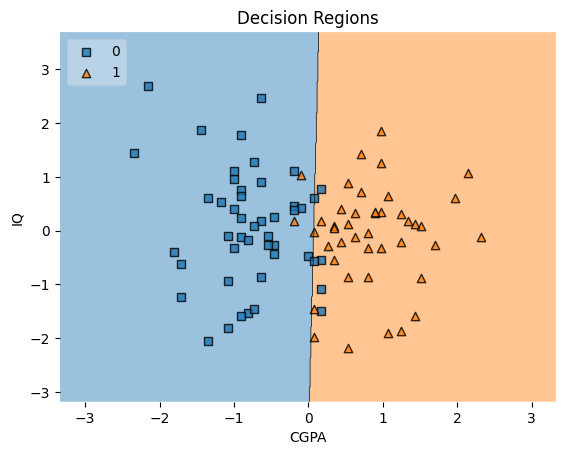

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=model, legend=2)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Decision Regions')
plt.show()